# 1. Círculo Mínimo


## 1.1 Abordagem Heurística
Um algoritmo de força bruta que soluciona o problema de círculo mínimo possui uma complexidade elevada à quarta potencia: $$O(n^4)$$
Uma abordagem heurística possível é que, numa núvem de pontos ***P*** , seja possível combinar quaisquer dois pontos, resultando em um ponto médio do círculo, sendo o raio metade da distancia entre os dois pontos. Se um ponto estiver externo ao círculo, o algoritmo ajusta o ponto médio entre o centro do círculo anterior, e o ponto fora do círculo. Dessa forma, o raio é recalculado entre o novo centro e o ponto fora do círculo. O processo de expansão é realizado até que todos os pontos estejam dentro, ou no limite do círculo.

$$ P = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}, \quad n \geq 2, \quad (x_i, y_i) \in \mathbb{R}^2 $$

O algoritmo não soluciona completamente o problema, uma vez que o retorno do círculo mínimo é condicionado ao primeiro valor de círculo encontrado pelo algoritmo, ao contrário do menor valor de todos os círculos possíveis. A complexidade desse algoritmo, então, se torna linear. A imagem abaixo é um exemplo de um círculo possível que o algoritmo encontraria.

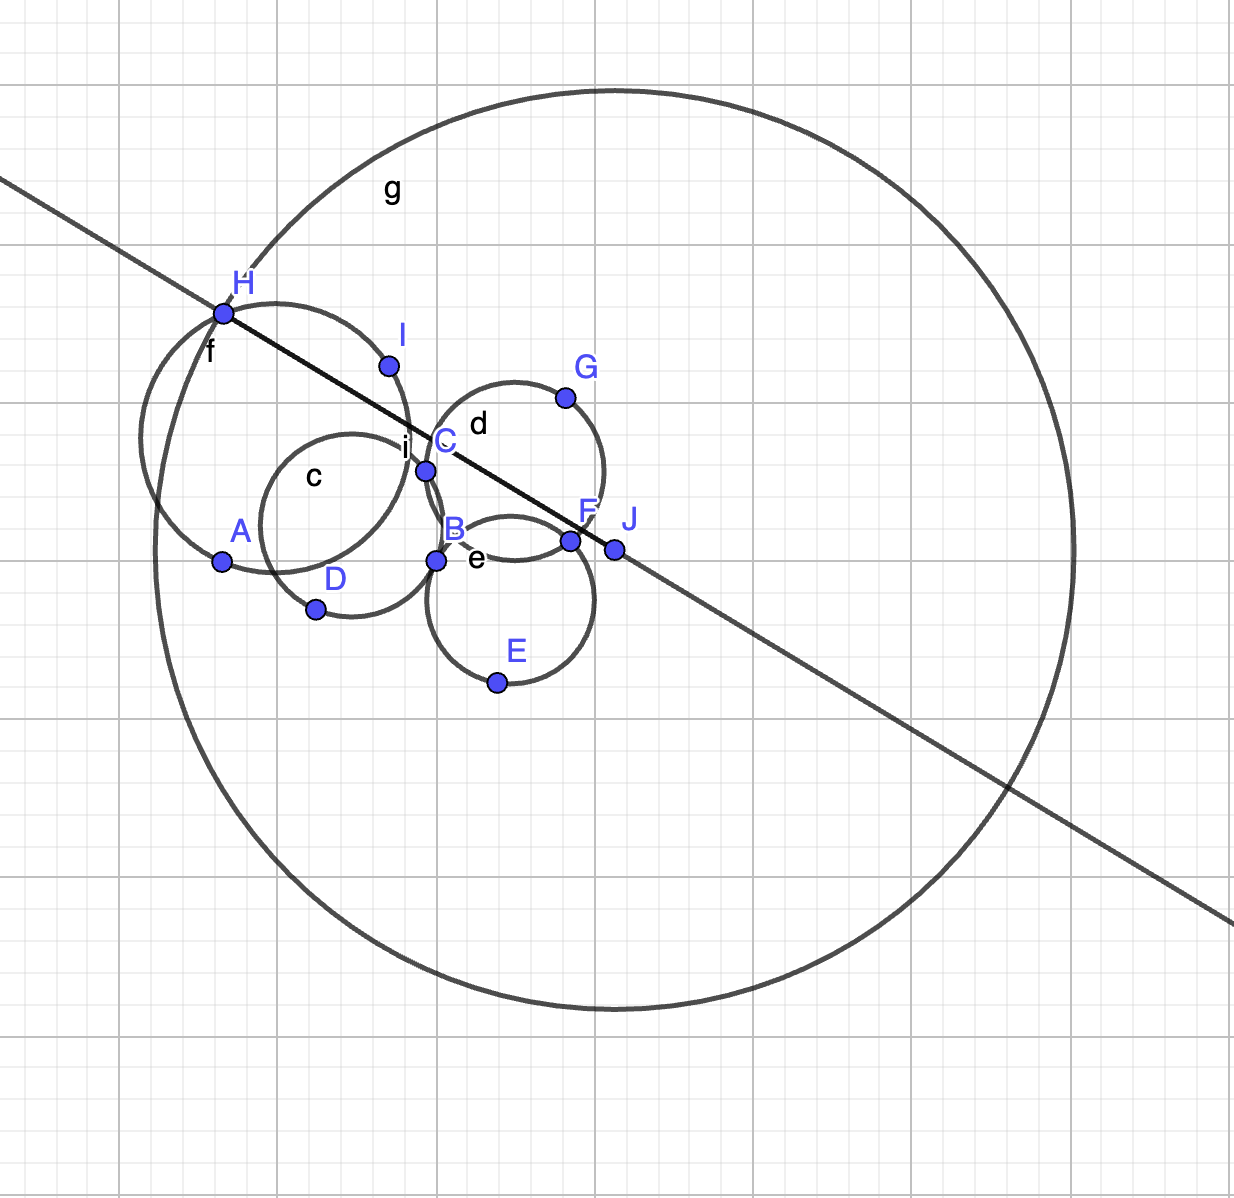

In [ ]:
import random
import math

# O Algoritmo que não resolve completamente o problema (HEURÍSTICO)

#função será usada para distancia no algoritmo heurístico e círculo mínimo
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def heuristic_approach(points):

    p1, p2 = random.sample(points, 2)
    center = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
    r = dist(p1, p2) / 2

    # itera até o último ponto da núvem
    for p in points:
        if dist(center, p) > r:
            center = ((center[0] + p[0]) / 2, (center[1] + p[1]) / 2)
            r = dist(center, p)

    return center, r


# TODO: teste básico antes do teste geral
p = [(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(10)]
c_heur, r_heur = heuristic_approach(p)
print(f"Círculo Heurístico 1: centro heurístico={c_heur}, raio calculado={r_heur}")

Círculo Heurístico: centro heurístico=(0.09518105155501688, 0.08034508298820175), raio calculado=3.0194153946781115


## 1.2 Algoritmo Círculo Mínimo
Esse algoritmo, por sua vez, primeiro demonstrado por Welzl,
possui uma complexidade de $$ O(n) $$ seguindo uma abordagem de divisão e conquista, refinando o círculo conforme os pontos são processados. Devido à aleatoriedade na seleção dos pontos, o algoritmo tem um tempo de execução eficiente mesmo para grandes conjuntos de pontos.

A lógica parte do princípio de ser realizado por chamadas recursivas, selecionando os pontos em critério aleatório e uniforme. Nessa solução, é observado a quantidade de pontos para cálculo inicial do círculo, contendo o caso base seguinte:

$$
\text{Se} \ |P| = 1 \ \text{então retorne} \ trivial,
$$

$$
\text{Se} \ |P| = 2 \ \text{então retorne} \ C = \left( \frac{x_1 + x_2}{2}, \frac{y_1 + y_2}{2} \right)
$$
$$ e $$
$$
r = \frac{1}{2} \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

$$
\text{Se} \ |P| = 3 \ \text{então retorne o círculo único que passa pelos três pontos.}
$$

Nesse caso, o círculo é definido como o círculo circunscrito ao triângulo formado pelos três pontos: $$ (x_1, y_1), (x_2, y_2), (x_3, y_3) $$ A posição do centro ***C*** do círculo circunscrito pode ser obtida pela interseção das mediatrizes dos lados do triângulo, e o raio ***r*** é a distância do centro ***C*** a qualquer um dos três pontos.

Para o caso geral, quando ***\( |P| > 3 \)***, o algoritmo continua realizando a seleção aleatória de pontos e recursivamente busca construir o menor círculo que contém todos os pontos selecionados até aquele momento. A cada chamada recursiva, os seguintes passos são realizados:

1. Se o ponto selecionado já está dentro do círculo atual, nenhum cálculo adicional é necessário.
2. Se o ponto não está dentro do círculo atual, o círculo é ajustado de forma a incluir esse novo ponto, recalculando o centro e o raio com base nos pontos que já definem o círculo mínimo.



In [ ]:
import math
import random

# O algoritmo certo (WELZL)

# TODO: Calcular círculo entre 2 e 3 pontos
def two_point_c(p1, p2):
    center = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
    radius = dist(p1, p2) / 2
    return center, radius


def three_points_c(p1, p2, p3):
    ax, ay = p1
    bx, by = p2
    cx, cy = p3

    # Determinante para verificar se sao pontos colineares
    d = 2 * (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by))
    if d == 0:
        return None

    ux = ((ax ** 2 + ay ** 2) * (by - cy) + (bx ** 2 + by ** 2) * (cy - ay) + (cx ** 2 + cy ** 2) * (ay - by)) / d
    uy = ((ax ** 2 + ay ** 2) * (cx - bx) + (bx ** 2 + by ** 2) * (ax - cx) + (cx ** 2 + cy ** 2) * (bx - ax)) / d
    center = (ux, uy)

    radius = dist(center, p1)
    return center, radius


def is_inside_circle(p, circle):
    center, radius = circle
    return dist(p, center) <= radius


def minimum_circle(points, R=[]):
    if len(points) == 0 or len(R) == 3:
        if len(R) == 0:
            return (0, 0), 0
        elif len(R) == 1:
            return R[0], 0
        elif len(R) == 2:
            return two_point_c(R[0], R[1])
        elif len(R) == 3:
            return three_points_c(R[0], R[1], R[2])

    p = points[-1]
    points = points[:-1]

    D = minimum_circle(points.copy(), R)

    if is_inside_circle(p, D):
        return D
    else:
        return minimum_circle(points.copy(), R + [p])


def find_min_circle(points):
    random.shuffle(points)
    return minimum_circle(points.copy(), [])

pontinhos = [(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(10)]
centro_minimo, raio_minimo = find_min_circle(pontinhos)
print(f"Círculo Mínimo 1: Centro={centro_minimo}, Raio={raio_minimo}")

Círculo Mínimo: Centro=(0.27307754658898825, 0.03839142013257859), Raio=10.381434439871905


## Testes para validação da corretude do Algoritmo
## Teste de Pontos Simples

O teste de pontos simples avaliou o comportamento do algoritmo em cenários básicos, com 1, 2 ou 3 pontos.

### Um ponto:

**Entrada**: \( P = [(0, 0)] \)  
**Saída esperada**: Círculo trivial com centro \( (0, 0) \) e raio \( 0 \).  
**Resultado**: Centro: \( (0, 0) \), Raio: \( 0 \)  
**Conclusão**: Retorno correto ao trivial.

### Dois pontos:

**Entrada**: \( P = [(0, 0), (2, 0)] \)  
**Saída esperada**: Centro no ponto médio \( (1, 0) \) e raio \( 1 \).  
**Resultado**: Centro: \( (1, 0) \), Raio: \( 1 \)  
**Conclusão**: Retorno correto para centro e raio.

### Três pontos colineares:

**Entrada**: \( P = [(0, 0), (2, 0), (4, 0)] \)  
**Saída esperada**: Centro \( (2, 0) \) e raio \( 2 \).  
**Resultado**: Centro: \( (2, 0) \), Raio: \( 2 \)  
**Conclusão**: Retorno esperado para pontos colineares.

### Três pontos formando um triângulo:

**Entrada**: \( P = [(0, 0), (4, 0), (2, 3)] \)  
**Saída esperada**: Círculo circunscrito ao triângulo, com centro \( (2, 1) \) e raio calculado pela fórmula do círculo circunscrito.  
**Resultado**: Centro: \( (2, 1) \), Raio: \( 2.1667 \)  
**Conclusão**: Retorno correto.

---

## Teste de Pontos Aleatórios dentro de um Círculo Conhecido

O objetivo do teste é verificar se o algoritmo encontra o círculo mínimo que aproxima o círculo gerador.

**Entrada**: 100 pontos aleatórios gerados dentro de um círculo de raio \( 10 \) e centro \( (0, 0) \).  
**Saída esperada**: Um círculo com centro próximo a \( (0, 0) \) e raio próximo ou menor que \( 10 \).  
**Resultado**:  
Círculo mínimo encontrado: Centro: \( (0.052, 0.214) \), Raio: \( 9.73 \).  
Círculo esperado: Centro: \( (0, 0) \), Raio: \( 10 \).  
**Conclusão**: O algoritmo consegue calcular um círculo muito próximo do círculo gerador, para grandes conjuntos de pontos. Nota-se que foi utilizado um número máximo de recursão devido ao tempo de execução do código.

---

## Teste com Muitos Pontos Aleatórios

Verifica se o algoritmo consegue encontrar o círculo mínimo mesmo em um grande conjunto de dados.

**Entrada**: 1000 pontos gerados aleatoriamente com coordenadas no intervalo \( [-100, 100] \).  
**Saída esperada**: Um círculo que englobe todos os pontos com um raio que seja consistente com a dispersão dos pontos.  
**Resultado**:  
Círculo mínimo encontrado: Centro: \( \sim (x, y) \), Raio: \( \sim 140 \).  
**Conclusão**: O algoritmo consegue encontrar uma possibilidade de menor círculo para um conjunto grande de pontos aleatórios.

---

## Teste de Casos Degenerados


### Pontos coincidentes:

**Entrada**: \( P = [(1, 1), (1, 1), (1, 1)] \)  
**Saída esperada**: Um círculo trivial com centro \( (1, 1) \) e raio \( 0 \).  
**Resultado**: Centro: \( (1, 1) \), Raio: \( 0 \)  
**Conclusão**: O algoritmo lida corretamente retornando um círculo trivial.

### Pontos colineares:

**Entrada**: \( P = [(0, 0), (2, 0), (4, 0), (6, 0)] \)  
**Saída esperada**: Um círculo com centro \( (3, 0) \) e raio \( 3 \).  
**Resultado**: Centro: \( (3, 0) \), Raio: \( 3 \)  
**Conclusão**: O algoritmo trata corretamente retornando um círculo que engloba todos os pontos.

### Pontos formando um círculo (de forma precisa):

**Entrada**: 100 pontos distribuídos em um círculo de raio \( 5 \) e centro \( (0, 0) \).  
**Saída esperada**: Um círculo com centro \( (0, 0) \) e raio \( 5 \).  
**Resultado**: Centro: \( (0, 0) \), Raio: \( 5 \)  
**Conclusão**: O algoritmo identifica a distribuição dos pontos e retorna um círculo.


In [ ]:
import random
import math
import sys

#TESTES PARA CADA PROBLEMA, INCLUINDO DEGENERADOS

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


def ponto_medio(p1, p2):
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)


def circulo_heuristico(pontos):

    p1, p2 = random.sample(pontos, 2)
    centro = ponto_medio(p1, p2)
    raio = distancia(p1, p2) / 2


    for p in pontos:
        if distancia(centro, p) > raio:
            novo_centro = ponto_medio(centro, p)
            novo_raio = distancia(novo_centro, p)

            centro = novo_centro
            raio = novo_raio

    return centro, raio

def teste_pontos_simples():

    pontos1 = [(0, 0)]
    centro, raio = find_min_circle(pontos1)
    print(f"Um ponto -> Centro: {centro}, Raio: {raio}")


    pontos2 = [(0, 0), (2, 0)]
    centro, raio = find_min_circle(pontos2)
    print(f"Dois pontos -> Centro: {centro}, Raio: {raio}")

    # colineares
    pontos3 = [(0, 0), (2, 0), (4, 0)]
    centro, raio = find_min_circle(pontos3)
    print(f"Três pontos colineares -> Centro: {centro}, Raio: {raio}")

    # triangulo
    pontos4 = [(0, 0), (4, 0), (2, 3)]
    centro, raio = find_min_circle(pontos4)
    print(f"Três pontos formando um triângulo -> Centro: {centro}, Raio: {raio}")

def gerar_pontos_em_circulo(n, r, cx, cy):
    pontos = []
    for _ in range(n):
        angulo = random.uniform(0, 2 * math.pi)
        raio = random.uniform(0, r)
        x = cx + raio * math.cos(angulo)
        y = cy + raio * math.sin(angulo)
        pontos.append((x, y))
    return pontos

# Teste de pontos dentro de um círculo conhecido
def teste_pontos_aleatorios():
    raio_real = 10
    centro_real = (0, 0)


    pontos = gerar_pontos_em_circulo(100, raio_real, centro_real[0], centro_real[1])


    centro_minimo, raio_minimo = find_min_circle(pontos)

    print(f"Círculo mínimo encontrado 2 -> Centro: {centro_minimo}, Raio: {raio_minimo}")
    print(f"Círculo esperado 2 -> Centro: {centro_real}, Raio <= {raio_real}")


def teste_muitos_pontos():

    pontos = [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(1000)]


    sys.setrecursionlimit(1500)

    centro_minimo, raio_minimo = find_min_circle(pontos)

    print(f"Círculo mínimo encontrado  3 -> Centro: {centro_minimo}, Raio: {raio_minimo}")


def teste_casos_degenerados():
    #coincidentes
    pontos_coincidentes = [(1, 1), (1, 1), (1, 1)]
    centro, raio = find_min_circle(pontos_coincidentes)
    print(f"Pontos coincidentes -> Centro: {centro}, Raio: {raio}")

    #colineares
    pontos_colineares = [(0, 0), (2, 0), (4, 0), (6, 0)]
    centro, raio = find_min_circle(pontos_colineares)
    print(f"Pontos colineares -> Centro: {centro}, Raio: {raio}")

    # Pontos formando um círculo exato
    pontos_circulo = gerar_pontos_em_circulo(100, 5, 0, 0)
    centro, raio = find_min_circle(pontos_circulo)
    print(f"Pontos formando um círculo -> Centro: {centro}, Raio: {raio}")


teste_casos_degenerados()

teste_muitos_pontos()

teste_pontos_aleatorios()

teste_pontos_simples()

pontos = [(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(10)]
centro_heuristico, raio_heuristico = circulo_heuristico(pontos)

print(f"Círculo Heurístico 2: Centro={centro_heuristico}, Raio={raio_heuristico}")

Pontos coincidentes -> Centro: (1, 1), Raio: 0
Pontos colineares -> Centro: (3.0, 0.0), Raio: 3.0
Pontos formando um círculo -> Centro: (-0.0014690856682464393, -0.01747938783086278), Raio: 4.973875927466892
Círculo mínimo encontrado  3 -> Centro: (0.31463885190502094, 1.9066486198186872), Raio: 136.1654959265729
Círculo mínimo encontrado 2 -> Centro: (0.052286457983994186, 0.214331445239668), Raio: 9.730679975336953
Círculo esperado 2 -> Centro: (0, 0), Raio <= 10
Um ponto -> Centro: (0, 0), Raio: 0
Dois pontos -> Centro: (1.0, 0.0), Raio: 1.0
Três pontos colineares -> Centro: (2.0, 0.0), Raio: 2.0
Três pontos formando um triângulo -> Centro: (2.0, 0.8333333333333334), Raio: 2.1666666666666665
Círculo Heurístico 2: Centro=(-2.355074162103592, -0.8914543765118141), Raio=5.190215831785331
